# Notebook for analysis of progress among football teams
Basis for the analysis is given by the file **Teams_with_Attributes.csv**. The data frame for the further analysis will be called **TwA** - which is abbreviation of the full name of the csv file. Some information from **Matches.csv** will be also used in this notebook

![Ball](./Ball.jpeg)









Picture source: www.computerweekly.com

# Motivation & Assumptions: 
# "By which football team can we observe the biggest progress? Which attributes seem to be deceisive for the team progress?
### I will try to answer this question in this notebook, however meeting some simplifications:
- The analysis is made regardless the country and the league
- In this notebook, by the team progress one can understand solely the points gained per season. Type of game (whether it would be about the ordinary league games, champions league, national cup, etc.) is considered as not affecting the final progress result  
- Only the teams with sufficient amount of matches will be analysed
- The line-up on the pitch always corresponds to the team style and attributes (despite the injuries, etc.)
- The final analysis and charts embrace only the best 10 teams in terms of progress
$$$$$$$$




### 1. Importing the necessary modules and setting display options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
pd.set_option('max_columns', None)
%matplotlib inline

### 2. Data import and choice of analysis range. Data Cleaning


**Firstly I would like to take a look at the file Matches.csv**<br>
In the first step I import all of the columns

In [2]:
Matches_all_columns = pd.read_csv('Matches.csv')

In [3]:
Matches_all_columns.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


**The columns giving the information about the bookmakers' odds and players who participated in the match, as well as they line-up will be omitted. One could argue, that the line-up should also be considered as a team attribute. However, the provided data gives information about professional teams, hence we could say with a high degree of probability, that the line-up corresponds and correlates with the team's characteristics
(please see assumptions at the begining of this notebook)**

In [4]:
for i, column in enumerate(Matches_all_columns):
    print(i,column)

0 id
1 country_id
2 league_id
3 season
4 stage
5 date
6 match_api_id
7 home_team_api_id
8 away_team_api_id
9 home_team_goal
10 away_team_goal
11 home_player_X1
12 home_player_X2
13 home_player_X3
14 home_player_X4
15 home_player_X5
16 home_player_X6
17 home_player_X7
18 home_player_X8
19 home_player_X9
20 home_player_X10
21 home_player_X11
22 away_player_X1
23 away_player_X2
24 away_player_X3
25 away_player_X4
26 away_player_X5
27 away_player_X6
28 away_player_X7
29 away_player_X8
30 away_player_X9
31 away_player_X10
32 away_player_X11
33 home_player_Y1
34 home_player_Y2
35 home_player_Y3
36 home_player_Y4
37 home_player_Y5
38 home_player_Y6
39 home_player_Y7
40 home_player_Y8
41 home_player_Y9
42 home_player_Y10
43 home_player_Y11
44 away_player_Y1
45 away_player_Y2
46 away_player_Y3
47 away_player_Y4
48 away_player_Y5
49 away_player_Y6
50 away_player_Y7
51 away_player_Y8
52 away_player_Y9
53 away_player_Y10
54 away_player_Y11
55 home_player_1
56 home_player_2
57 home_player_3
58 home

Only the first 11 columns will be imported:

In [5]:
Matches = pd.read_csv('Matches.csv', usecols = [*range(0,11)])

**The second step is the import of teams together with their attributes. Hence I import "Teams_with_Attributes.csv**<br>
In the first step I import all of the columns

In [6]:
TwA = pd.read_csv('Teams_with_Attributes.csv')

In [7]:
TwA.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id.1,team_fifa_api_id.1,team_api_id.1,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,49119,9930,434,FC Aarau,AAR,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,49119,9930,434,FC Aarau,AAR,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,49119,9930,434,FC Aarau,AAR,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,39393,8485,77,Aberdeen,ABE,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,39393,8485,77,Aberdeen,ABE,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


As presented above some columns are duplicated which is the effect of the sql import (all columns chosen in query).
In the next step, I drop the duplicated columns, as well as column "team_fifa_api_id", which is not necessary for the analysis

In [8]:
TwA.drop(['team_fifa_api_id', 'id.1', 'team_fifa_api_id.1', 'team_api_id.1'], axis = 1, inplace = True)

In [9]:
TwA.date.value_counts().sort_index(ascending = False)

2015-09-10 00:00:00    245
2014-09-19 00:00:00    244
2013-09-20 00:00:00    242
2012-02-22 00:00:00    242
2011-02-22 00:00:00    244
2010-02-22 00:00:00    241
Name: date, dtype: int64

We can deduce from the cell above, that the characteristics of the teams were measured on the following dates:
- beginning of the season 2015/2016
- beginning of the season 2014/2015
- beginning of the season 2013/2014
- in the halfway of the season 2011/2012
- in the halfway of the season 2010/2011
- in the halfway of the season 2009/2010<br><br>

**We can clearly see, that there is a gap. There is no information about the teams for the season 2012/2013.**<br>
This fact will be just ignored.<br><br>
In order to make consistent analysis, it is necessary to drop the teams, which do not have entries for all of the abovementioned seasons:

In [10]:
filter_dates = TwA.groupby(TwA.team_long_name)['date'].count()

filter_dates = filter_dates[filter_dates == len(TwA.date.value_counts())]
filter_dates = list(filter_dates.index)
TwA = TwA.query('team_long_name in @filter_dates')

A brief look at the information table indicates the large amount of missing values in the column _buildUpPlayDribblingClass_. I have decided to drop it from the data frame.

In [11]:
TwA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134 entries, 3 to 1457
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1134 non-null   int64  
 1   team_api_id                     1134 non-null   int64  
 2   team_long_name                  1134 non-null   object 
 3   team_short_name                 1134 non-null   object 
 4   date                            1134 non-null   object 
 5   buildUpPlaySpeed                1134 non-null   int64  
 6   buildUpPlaySpeedClass           1134 non-null   object 
 7   buildUpPlayDribbling            378 non-null    float64
 8   buildUpPlayDribblingClass       1134 non-null   object 
 9   buildUpPlayPassing              1134 non-null   int64  
 10  buildUpPlayPassingClass         1134 non-null   object 
 11  buildUpPlayPositioningClass     1134 non-null   object 
 12  chanceCreationPassing           11

In [12]:
TwA.drop('buildUpPlayDribbling', axis = 1, inplace = True)

**All the matches, which did not take place in the seasons defined for analysing teams' attributes shall be dropped**

In [13]:
Matches = Matches[(Matches.season == '2015/2016') #skills measured in the beginning of the season
                 |(Matches.season == '2014/2015') #skills measured in the beginning of the season
                 |(Matches.season == '2013/2014') #skills measured in the beginning of the season
                 |(Matches.season == '2011/2012') #skills measured in the halfway of the season
                 |(Matches.season == '2010/2011') #skills measured in the halfway of the season
                 |(Matches.season == '2009/2010') #skills measured in the halfway of the season          
       ]

In [14]:
Matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
306,307,1,1,2009/2010,1,2009-07-31 00:00:00,665318,9985,9997,2,2
307,308,1,1,2009/2010,1,2009-08-02 00:00:00,665320,9986,8342,1,2
308,309,1,1,2009/2010,1,2009-08-02 00:00:00,665321,9984,9991,1,3
309,310,1,1,2009/2010,1,2009-08-01 00:00:00,665322,9994,10000,1,1
310,311,1,1,2009/2010,1,2009-08-01 00:00:00,665323,8571,8635,0,2


Columns: _date, stage, match_api_id_ are not needed anymore. The columns: _country_id_ and _league_id_ are preserved for the case, the description of the table shall be ehanced at the end of the analysis.

In [15]:
Matches.drop(['date', 'stage', 'match_api_id'], axis = 1, inplace = True)

### 3. Core Wrangling - definition of "points per match" data frame


**The aim of this chapter is to produce a data frame, where one can easily pull out the numerical information how the particular team performed in each season.**<br><br>
The first step is to define the winner of each match.

In [16]:
Winner = []

for entry in Matches.index:
    if Matches.home_team_goal[entry] > Matches.away_team_goal[entry]:
        result = 'Home'
    elif Matches.home_team_goal[entry] < Matches.away_team_goal[entry]:
        result = 'Away'
    else:
        result = 'Draw'
        
    Winner.append(result)

Matches['Winner'] = Winner

In [17]:
TwA.head()

,id,team_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
3,39393,8485,Aberdeen,ABE,2010-02-22 00:00:00,70,Fast,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,39393,8485,Aberdeen,ABE,2011-02-22 00:00:00,47,Balanced,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
5,39393,8485,Aberdeen,ABE,2012-02-22 00:00:00,58,Balanced,Little,62,Mixed,Organised,45,Normal,70,Lots,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover
6,39393,8485,Aberdeen,ABE,2013-09-20 00:00:00,62,Balanced,Little,45,Mixed,Organised,40,Normal,50,Normal,55,Normal,Organised,42,Medium,42,Press,60,Normal,Cover
7,39393,8485,Aberdeen,ABE,2014-09-19 00:00:00,58,Balanced,Normal,62,Mixed,Organised,56,Normal,68,Lots,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover


The second step is to provide the same format of seasons for TwA data frame, as it is in Matches data frame.
Since there is a different approach for defining names in that column for seasons 2009/2010 - 2011/2012 and for seasons 2013/2014 - 2015/2016, I have decided to forgo making the function for that.

In [18]:
seasons = []
for element in TwA.date:
    if element.startswith('2010'):
        seasons.append('2009/2010')
    if element.startswith('2011'):
        seasons.append('2010/2011')
    if element.startswith('2012'):
        seasons.append('2011/2012')
    if element.startswith('2013'):
        seasons.append('2013/2014')        
    if element.startswith('2014'):
        seasons.append('2014/2015')        
    if element.startswith('2015'):
        seasons.append('2015/2016')
        
        

In [19]:
TwA['season'] = seasons

In [20]:
TwA.head()

,id,team_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,season
3,39393,8485,Aberdeen,ABE,2010-02-22 00:00:00,70,Fast,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,2009/2010
4,39393,8485,Aberdeen,ABE,2011-02-22 00:00:00,47,Balanced,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,2010/2011
5,39393,8485,Aberdeen,ABE,2012-02-22 00:00:00,58,Balanced,Little,62,Mixed,Organised,45,Normal,70,Lots,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover,2011/2012
6,39393,8485,Aberdeen,ABE,2013-09-20 00:00:00,62,Balanced,Little,45,Mixed,Organised,40,Normal,50,Normal,55,Normal,Organised,42,Medium,42,Press,60,Normal,Cover,2013/2014
7,39393,8485,Aberdeen,ABE,2014-09-19 00:00:00,58,Balanced,Normal,62,Mixed,Organised,56,Normal,68,Lots,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover,2014/2015


Columns: _team_short_name, date and id_ are not required anymore

In [21]:
TwA.drop(['team_short_name', 'date', 'id'], inplace = True, axis = 1)

The _season_ column is visible at the end 

In [22]:
for i, v in enumerate(TwA):
    print(i,v)

0 team_api_id
1 team_long_name
2 buildUpPlaySpeed
3 buildUpPlaySpeedClass
4 buildUpPlayDribblingClass
5 buildUpPlayPassing
6 buildUpPlayPassingClass
7 buildUpPlayPositioningClass
8 chanceCreationPassing
9 chanceCreationPassingClass
10 chanceCreationCrossing
11 chanceCreationCrossingClass
12 chanceCreationShooting
13 chanceCreationShootingClass
14 chanceCreationPositioningClass
15 defencePressure
16 defencePressureClass
17 defenceAggression
18 defenceAggressionClass
19 defenceTeamWidth
20 defenceTeamWidthClass
21 defenceDefenderLineClass
22 season


Below just the rearangement of the columns. Not significant for the analysis itself

In [23]:
TwA = TwA.iloc[:,np.r_[0,1,22,3:21]]

**The overview of avaiable data frames at this stage of the analysis**

In [24]:
TwA.head()

,team_api_id,team_long_name,season,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass
3,8485,Aberdeen,2009/2010,Fast,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide
4,8485,Aberdeen,2010/2011,Balanced,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal
5,8485,Aberdeen,2011/2012,Balanced,Little,62,Mixed,Organised,45,Normal,70,Lots,55,Normal,Organised,40,Medium,40,Press,60,Normal
6,8485,Aberdeen,2013/2014,Balanced,Little,45,Mixed,Organised,40,Normal,50,Normal,55,Normal,Organised,42,Medium,42,Press,60,Normal
7,8485,Aberdeen,2014/2015,Balanced,Normal,62,Mixed,Organised,56,Normal,68,Lots,57,Normal,Organised,41,Medium,42,Press,60,Normal


In [25]:
Matches.head()

,id,country_id,league_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Winner
306,307,1,1,2009/2010,9985,9997,2,2,Draw
307,308,1,1,2009/2010,9986,8342,1,2,Away
308,309,1,1,2009/2010,9984,9991,1,3,Away
309,310,1,1,2009/2010,9994,10000,1,1,Draw
310,311,1,1,2009/2010,8571,8635,0,2,Away


In [26]:
TwA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134 entries, 3 to 1457
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   team_api_id                     1134 non-null   int64 
 1   team_long_name                  1134 non-null   object
 2   season                          1134 non-null   object
 3   buildUpPlaySpeedClass           1134 non-null   object
 4   buildUpPlayDribblingClass       1134 non-null   object
 5   buildUpPlayPassing              1134 non-null   int64 
 6   buildUpPlayPassingClass         1134 non-null   object
 7   buildUpPlayPositioningClass     1134 non-null   object
 8   chanceCreationPassing           1134 non-null   int64 
 9   chanceCreationPassingClass      1134 non-null   object
 10  chanceCreationCrossing          1134 non-null   int64 
 11  chanceCreationCrossingClass     1134 non-null   object
 12  chanceCreationShooting          1134 non-null   

In [27]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19393 entries, 306 to 25978
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                19393 non-null  int64 
 1   country_id        19393 non-null  int64 
 2   league_id         19393 non-null  int64 
 3   season            19393 non-null  object
 4   home_team_api_id  19393 non-null  int64 
 5   away_team_api_id  19393 non-null  int64 
 6   home_team_goal    19393 non-null  int64 
 7   away_team_goal    19393 non-null  int64 
 8   Winner            19393 non-null  object
dtypes: int64(7), object(2)
memory usage: 2.1+ MB


**In here the series of home teams and away teams are made (_Teams_away_ could have been made also via copying the _Teams_home_ ). The next step is merging the teams with the _Matches_ data frame via their _team_api_id_ )**

In [28]:
Teams_home = (TwA.iloc[:,[0,1]]).drop_duplicates()
Teams_away = (TwA.iloc[:,[0,1]]).drop_duplicates()



In [29]:
Matches = Matches.merge(Teams_home, left_on = 'home_team_api_id', right_on = 'team_api_id')
                                                                                 
Matches.rename(columns = {'team_long_name': 'home_team'}, inplace = True)
Matches.drop(['home_team_api_id', 'team_api_id'], axis = 1, inplace = True)
                                                                                

In [30]:
Matches = Matches.merge(Teams_away, left_on = 'away_team_api_id', right_on = 'team_api_id')


Matches.rename(columns = {'team_long_name': 'away_team'}, inplace = True)
Matches.drop(['away_team_api_id', 'team_api_id'], axis = 1, inplace = True)
Matches.head()

,id,country_id,league_id,season,home_team_goal,away_team_goal,Winner,home_team,away_team
0,315,1,1,2009/2010,1,0,Home,Standard de Liège,KRC Genk
1,663,1,1,2010/2011,0,2,Away,Standard de Liège,KRC Genk
2,830,1,1,2011/2012,0,0,Draw,Standard de Liège,KRC Genk
3,1436,1,1,2014/2015,1,0,Home,Standard de Liège,KRC Genk
4,1658,1,1,2015/2016,2,1,Home,Standard de Liège,KRC Genk


**Here happens the association of the teams, matches and points:**
- 3 points for win
- 1 point for draw
- 0 points for lose

In [31]:
Points_home = []
Points_away = []

for element in Matches.index:
    
    if Matches.Winner[element] == 'Home':
        Points_home.append(3)
        Points_away.append(0)
    if Matches.Winner[element] == 'Away':
        Points_home.append(0)
        Points_away.append(3)
    if Matches.Winner[element] == 'Draw':
        Points_home.append(1)
        Points_away.append(1)

Matches['Points_home'] = Points_home
Matches['Points_away'] = Points_away



In [32]:
Matches.head()

,id,country_id,league_id,season,home_team_goal,away_team_goal,Winner,home_team,away_team,Points_home,Points_away
0,315,1,1,2009/2010,1,0,Home,Standard de Liège,KRC Genk,3,0
1,663,1,1,2010/2011,0,2,Away,Standard de Liège,KRC Genk,0,3
2,830,1,1,2011/2012,0,0,Draw,Standard de Liège,KRC Genk,1,1
3,1436,1,1,2014/2015,1,0,Home,Standard de Liège,KRC Genk,3,0
4,1658,1,1,2015/2016,2,1,Home,Standard de Liège,KRC Genk,3,0


**The analysis of the progress of the team makes sense only if there is a suffcient number of games. I have decided to leave only the teams which have had at least 100 games played in general.**<br><br>
<span style="color:purple"> **Attention!** Since I am dropping here the teams with less than 100 games, it may happen, that some of the teams left in the resultant data frame will have less games at the end of the day than this sought 100 (at last it might have happend, they played mostly with those dropped ones). However, in the next steps I am not only making the data frame with summarized points, but also with summarized plays per team per season, where the total number of games will be checked again</span>

In [33]:
Teams_over100 = Matches.home_team.value_counts()+Matches.away_team.value_counts()
for i,value in zip(copy.copy(Teams_over100.index),copy.copy(Teams_over100.values)):
    if value <100:
        Teams_over100.drop(i, inplace = True)

In [34]:
Teams_over100

1. FC Köln                 166
1. FC Nürnberg             134
1. FSV Mainz 05            198
ADO Den Haag               130
AJ Auxerre                 106
                          ... 
Vitória Setúbal            120
West Bromwich Albion       190
West Ham United            190
Wigan Athletic             114
Wolverhampton Wanderers    114
Length: 135, dtype: int64

In [35]:
Matches = Matches.query('home_team in @Teams_over100.index | away_team in @Teams_over100.index')

**Summarizing points and played matches**

In [36]:
Matches_points = Matches.groupby(['away_team','season'])['Points_away'].sum() \
+Matches.groupby(['home_team','season'])['Points_home'].sum()



In [37]:
Matches_played = Matches.groupby(['away_team', 'season'])['Points_away'].count() \
+Matches.groupby(['home_team','season'])['Points_home'].count()

In [38]:
Teams_points = pd.DataFrame(Matches_points)
Teams_points.rename(columns = {0:"Points"}, inplace = True)
Teams_points.rename_axis(index = ["Team", 'Data Frame presenting points in particular season'], inplace = True)
Teams_points

Points
Team                    Data Frame presenting points in particular season        
1. FC Kaiserslautern    2010/2011                                              43
                        2011/2012                                              23
1. FC Köln              2009/2010                                              38
                        2010/2011                                              44
                        2011/2012                                              30
...                                                                           ...
Wigan Athletic          2010/2011                                              42
                        2011/2012                                              43
Wolverhampton Wanderers 2009/2010                                              38
                        2010/2011                                              40
                        2011/2012                                              25

[762 rows x 1 columns]

In [39]:
Teams_games = pd.DataFrame(Matches_played)
Teams_games.rename(columns = {0:"Plays"}, inplace = True)
Teams_games.rename_axis(index = ["Team", 'Data Frame presenting plays in particular season'], inplace = True)
Teams_games

Plays
Team                    Data Frame presenting plays in particular season       
1. FC Kaiserslautern    2010/2011                                            32
                        2011/2012                                            34
1. FC Köln              2009/2010                                            34
                        2010/2011                                            34
                        2011/2012                                            34
...                                                                         ...
Wigan Athletic          2010/2011                                            38
                        2011/2012                                            38
Wolverhampton Wanderers 2009/2010                                            38
                        2010/2011                                            38
                        2011/2012                                            38

[762 rows x 1 columns]

**At this stage the teams which have not participated in all seasons are going to be dropped.**
<br><br><br>I will manage that via dropping the null values from the data frame where:
- rows = teams
- columns = seasons
- values = played matches

In [40]:
Teams_games = Teams_games.pivot_table(index = "Team", 
                                 columns = ['Data Frame presenting plays in particular season'], 
                                 values = 'Plays')

In [41]:
Teams_games.dropna(inplace = True)
Teams_games

Data Frame presenting plays in particular season,2009/2010,2010/2011,2011/2012,2013/2014,2014/2015,2015/2016
Team,,,,,,
1. FSV Mainz 05,34.0,34.0,34.0,32.0,34.0,30.0
ADO Den Haag,22.0,22.0,22.0,22.0,22.0,20.0
AS Saint-Étienne,32.0,38.0,36.0,30.0,28.0,28.0
AZ,22.0,22.0,22.0,22.0,22.0,20.0
Aberdeen,24.0,23.0,23.0,22.0,21.0,18.0
...,...,...,...,...,...,...
VfL Wolfsburg,34.0,34.0,34.0,32.0,34.0,30.0
Villarreal CF,32.0,34.0,34.0,36.0,34.0,34.0
Vitesse,22.0,22.0,22.0,22.0,22.0,20.0


**In that manner, I have obtained the data frame with full information regarding number of played matches per team.**<br>
The smallest number of played matches is equal to 16 (please see the next cell). In my opinion 16 is still a sufficient amount for assessing the team's progress.

In [42]:
Teams_games.min().min() #Note: One call of aggregation function "min" will give the minimal number of matches per season

16.0

#### The last stage in defining the "points per match" data frame is making a similliar data frame for points and dividing it with the "teams_games" data frame

In [43]:
Teams_points = Teams_points.pivot_table(index = "Team", 
                                 columns = ['Data Frame presenting points in particular season'], 
                                 values = 'Points')

In [44]:
Teams_points.dropna(inplace = True)
Teams_points

Data Frame presenting points in particular season,2009/2010,2010/2011,2011/2012,2013/2014,2014/2015,2015/2016
Team,,,,,,
1. FSV Mainz 05,47.0,58.0,39.0,50.0,40.0,46.0
ADO Den Haag,15.0,30.0,20.0,28.0,21.0,25.0
AS Saint-Étienne,27.0,49.0,54.0,51.0,42.0,33.0
AZ,33.0,39.0,36.0,25.0,33.0,32.0
Aberdeen,28.0,12.0,22.0,41.0,35.0,35.0
...,...,...,...,...,...,...
VfL Wolfsburg,50.0,38.0,44.0,59.0,69.0,37.0
Villarreal CF,43.0,54.0,37.0,56.0,52.0,54.0
Vitesse,15.0,14.0,26.0,31.0,29.0,18.0


In [45]:
Teams_points_per_match  = Teams_points / Teams_games

In [46]:
Teams_points_per_match.rename_axis(columns = ["season / points_per_match"], inplace = True)
Teams_points_per_match = Teams_points_per_match.round(2)

In [47]:
Teams_points_per_match 

season / points_per_match,2009/2010,2010/2011,2011/2012,2013/2014,2014/2015,2015/2016
Team,,,,,,
1. FSV Mainz 05,1.38,1.71,1.15,1.56,1.18,1.53
ADO Den Haag,0.68,1.36,0.91,1.27,0.95,1.25
AS Saint-Étienne,0.84,1.29,1.50,1.70,1.50,1.18
AZ,1.50,1.77,1.64,1.14,1.50,1.60
Aberdeen,1.17,0.52,0.96,1.86,1.67,1.94
...,...,...,...,...,...,...
VfL Wolfsburg,1.47,1.12,1.29,1.84,2.03,1.23
Villarreal CF,1.34,1.59,1.09,1.56,1.53,1.59
Vitesse,0.68,0.64,1.18,1.41,1.32,0.90


### 4. Data Exploration - Progress among the teams and seasons
This chapter refers to assessing which teams made the best progress between year 2009 and 2016. Furthermore, the line chart presenting the history of this progress will be presented.

In [48]:
Teams_points_per_match['Improvement_2016_2009'] = Teams_points_per_match['2015/2016'] - Teams_points_per_match['2009/2010']

**I have decided to assess the progress in a very simple way, by substracting the points per match for season 2009/2010 from the points per match for season 2015/2016** 

In [49]:
Teams_points_per_match.rename_axis(columns = ["season"], inplace = True)

In [50]:
Teams_points_per_match

season,2009/2010,2010/2011,2011/2012,2013/2014,2014/2015,2015/2016,Improvement_2016_2009
Team,,,,,,,
1. FSV Mainz 05,1.38,1.71,1.15,1.56,1.18,1.53,0.15
ADO Den Haag,0.68,1.36,0.91,1.27,0.95,1.25,0.57
AS Saint-Étienne,0.84,1.29,1.50,1.70,1.50,1.18,0.34
AZ,1.50,1.77,1.64,1.14,1.50,1.60,0.10
Aberdeen,1.17,0.52,0.96,1.86,1.67,1.94,0.77
...,...,...,...,...,...,...,...
VfL Wolfsburg,1.47,1.12,1.29,1.84,2.03,1.23,-0.24
Villarreal CF,1.34,1.59,1.09,1.56,1.53,1.59,0.25
Vitesse,0.68,0.64,1.18,1.41,1.32,0.90,0.22


**Sorting the values by the new column and using the head() function give us a quick insight about the best teams in the manner of progress.**

In [51]:
Teams_points_per_match.sort_values(by = 'Improvement_2016_2009', ascending = False).head(10)

season,2009/2010,2010/2011,2011/2012,2013/2014,2014/2015,2015/2016,Improvement_2016_2009
Team,,,,,,,
Paris Saint-Germain,1.09,1.58,2.08,2.33,2.25,2.43,1.34
Atlético Madrid,1.19,1.59,1.41,2.33,2.00,2.24,1.05
Sporting CP,1.50,1.40,1.90,2.10,2.10,2.55,1.05
Juventus,1.42,1.53,2.24,2.72,2.31,2.44,1.02
Aberdeen,1.17,0.52,0.96,1.86,1.67,1.94,0.77
OGC Nice,1.00,1.21,1.14,1.00,1.29,1.64,0.64
Borussia Dortmund,1.68,2.21,2.38,2.03,1.35,2.27,0.59
ADO Den Haag,0.68,1.36,0.91,1.27,0.95,1.25,0.57
St. Johnstone FC,1.00,0.91,0.88,1.41,1.67,1.56,0.56


In [52]:
Teams_points_per_match_TOP10 = (Teams_points_per_match.sort_values(by = 'Improvement_2016_2009', ascending = False)).iloc[:10,-1]

In [53]:
Teams_points_per_match_TOP10

Team
Paris Saint-Germain    1.34
Atlético Madrid        1.05
Sporting CP            1.05
Juventus               1.02
Aberdeen               0.77
OGC Nice               0.64
Borussia Dortmund      0.59
ADO Den Haag           0.57
St. Johnstone FC       0.56
Napoli                 0.53
Name: Improvement_2016_2009, dtype: float64

**And again the best 10, this time presented by a bar chart**

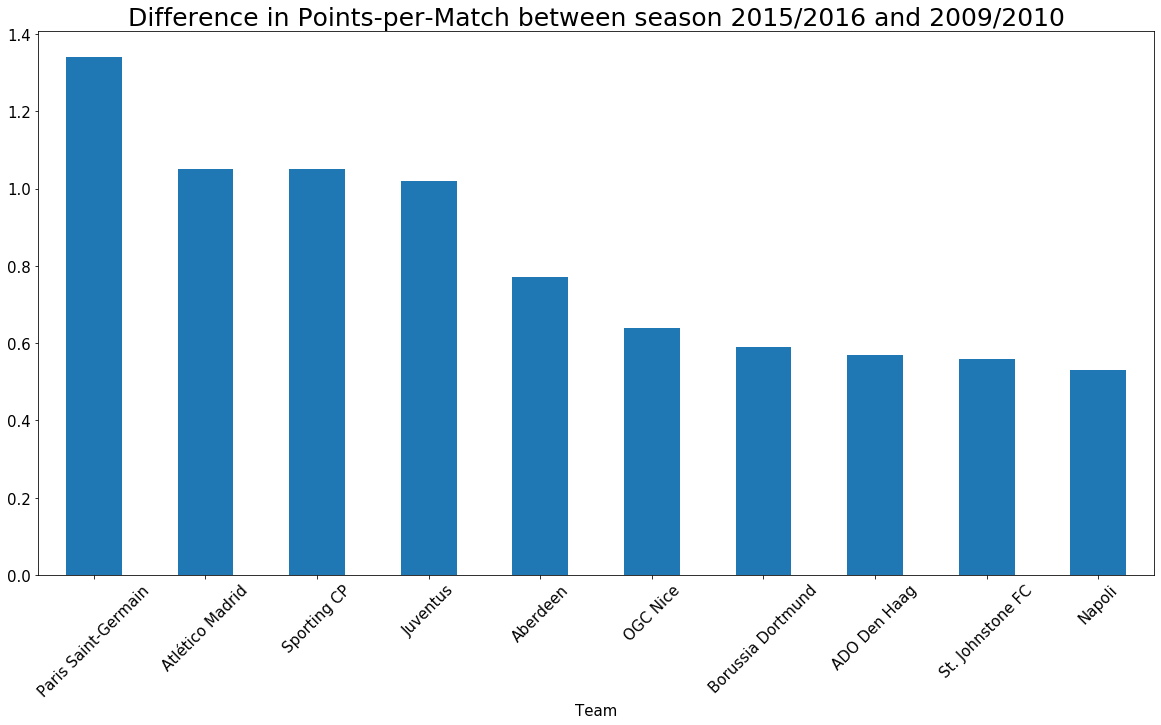

In [54]:
plt.rcParams.update({'font.size': 15})
ax = plt.gca()
Teams_points_per_match_TOP10.plot(kind = 'bar', figsize = (20,10));
plt.xticks(rotation = 45)
plt.title('Difference in Points-per-Match between season 2015/2016 and 2009/2010', fontsize = 25);

### The chart below will present the course of progress of each of these teams along the timeline

In [55]:
Teams_points_per_match_TOP10 = (Teams_points_per_match.sort_values(by = 'Improvement_2016_2009', ascending = False)).iloc[:10,:-1]

In [56]:
Teams_points_per_match_TOP10

season,2009/2010,2010/2011,2011/2012,2013/2014,2014/2015,2015/2016
Team,,,,,,
Paris Saint-Germain,1.09,1.58,2.08,2.33,2.25,2.43
Atlético Madrid,1.19,1.59,1.41,2.33,2.00,2.24
Sporting CP,1.50,1.40,1.90,2.10,2.10,2.55
Juventus,1.42,1.53,2.24,2.72,2.31,2.44
Aberdeen,1.17,0.52,0.96,1.86,1.67,1.94
OGC Nice,1.00,1.21,1.14,1.00,1.29,1.64
Borussia Dortmund,1.68,2.21,2.38,2.03,1.35,2.27
ADO Den Haag,0.68,1.36,0.91,1.27,0.95,1.25
St. Johnstone FC,1.00,0.91,0.88,1.41,1.67,1.56


In [57]:
x = np.arange(0,len(Teams_points_per_match.columns)-1)

x_ticks_seasons = list(Teams_points_per_match.columns[:-1])

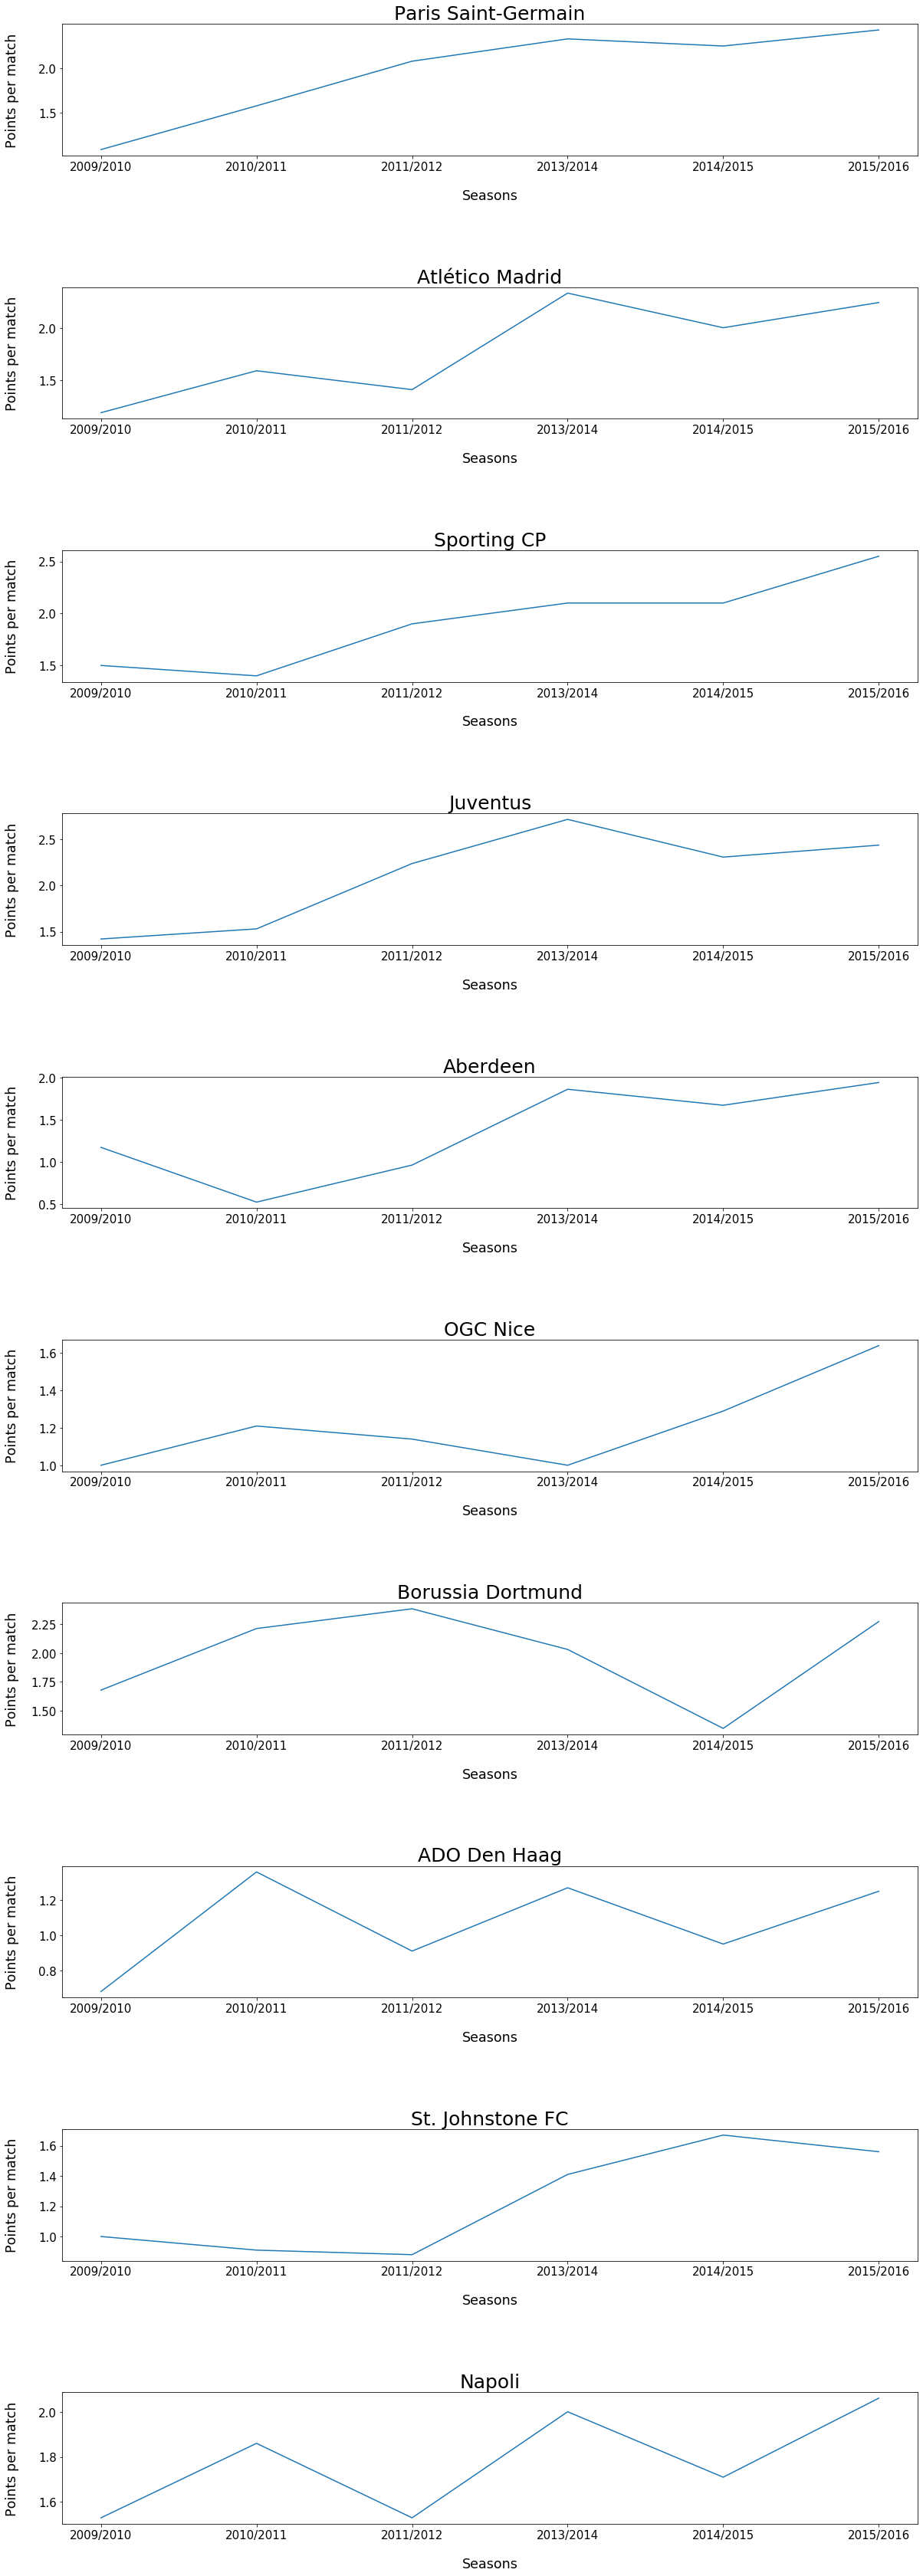

In [58]:
fig, axes = plt.subplots(nrows = 10, ncols = 1, sharey = False, sharex = False, 
                         gridspec_kw={'hspace': 1})

plt.xticks(x,x_ticks_seasons)


for i in range(0,len(Teams_points_per_match_TOP10)):

    Teams_points_per_match_TOP10.iloc[i].plot.line(ax = axes[i], 
                                                x = Teams_points_per_match_TOP10.iloc[i].index, 
                                                y = Teams_points_per_match_TOP10.iloc[i].values, 
                                                figsize = (20,60))

for i in range(0,len(Teams_points_per_match_TOP10)):
    axes[i].set_xlabel('Seasons', fontsize = 17.5)
    axes[i].set_ylabel('Points per match', fontsize = 17.5)
    axes[i].set_title(Teams_points_per_match_TOP10.index[i], fontsize = 25)
    axes[i].xaxis.set_label_coords(0.5,-0.25)
    axes[i].yaxis.set_label_coords(-0.05, 0.5)





### 5. Drawing Conculsions
In this chapter I will try to draw some conclusions from the analysed data. Especially which attributes decide whether the team gains progress or not.<br><br>
In the first step a brief look back at the TwA data frame shall be made - just to memorize the available data describing team attributes. 

In [59]:
TwA.head()

,team_api_id,team_long_name,season,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass
3,8485,Aberdeen,2009/2010,Fast,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide
4,8485,Aberdeen,2010/2011,Balanced,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal
5,8485,Aberdeen,2011/2012,Balanced,Little,62,Mixed,Organised,45,Normal,70,Lots,55,Normal,Organised,40,Medium,40,Press,60,Normal
6,8485,Aberdeen,2013/2014,Balanced,Little,45,Mixed,Organised,40,Normal,50,Normal,55,Normal,Organised,42,Medium,42,Press,60,Normal
7,8485,Aberdeen,2014/2015,Balanced,Normal,62,Mixed,Organised,56,Normal,68,Lots,57,Normal,Organised,41,Medium,42,Press,60,Normal


The last plot (10 subplots) in chapter 4 gives us information about the progress of 10 teams. In my opinion the most interesting line charts are:
- Paris Saint-Germain -> since in this case, one can observe a constant growth of effectiveness among seasons
- Atletico Madrid seasons 2011/2012 and 2013/2014 -> between those seasons one could observe sudden increament of effectiveness
- Borussia Dortmund seasons 2014/2015 and 2015/2016 -> between those seasons one could observe sudden increament of effectiveness

In [60]:
PSG = TwA.query('(season == "2009/2010" or season == "2015/2016") \
                                            & (team_long_name  == "Paris Saint-Germain")')

In [61]:
PSG

,team_api_id,team_long_name,season,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass
961,9847,Paris Saint-Germain,2009/2010,Balanced,Little,65,Mixed,Organised,40,Normal,65,Normal,55,Normal,Organised,70,High,70,Double,70,Wide
966,9847,Paris Saint-Germain,2015/2016,Balanced,Normal,34,Mixed,Organised,62,Normal,61,Normal,35,Normal,Organised,57,Medium,53,Press,56,Normal


**In case of PSG we can observe a higher amount of chances creation via passing and less via shooting. Furthermore we can observe more dribbling. Last but not least there is a different behaviour of defence to be noted - less aggressive and with deeper line**

In [62]:
Atletico = TwA.query('(season == "2011/2012" or season == "2013/2014") \
                                            & (team_long_name  == "Atlético Madrid")')

In [63]:
Atletico

,team_api_id,team_long_name,season,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass
96,9906,Atlético Madrid,2011/2012,Balanced,Little,51,Mixed,Organised,67,Risky,63,Normal,54,Normal,Organised,52,Medium,37,Press,55,Normal
97,9906,Atlético Madrid,2013/2014,Balanced,Little,51,Mixed,Organised,70,Risky,65,Normal,54,Normal,Organised,52,Medium,37,Press,55,Normal


<span style="color:red">**The case of Atletico Madrid occured to be not so meaningful. The better results of this team are probably connected with weaker form of their league opponents in that time.**</span>

In [64]:
BVB = TwA.query('(season == "2014/2015" or season == "2015/2016") \
                                            & (team_long_name  == "Borussia Dortmund")')

In [65]:
BVB

,team_api_id,team_long_name,season,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass
213,9789,Borussia Dortmund,2014/2015,Fast,Little,61,Mixed,Organised,53,Normal,44,Normal,73,Lots,Free Form,60,Medium,68,Double,43,Normal
214,9789,Borussia Dortmund,2015/2016,Fast,Normal,40,Mixed,Organised,70,Risky,44,Normal,49,Normal,Free Form,65,Medium,71,Double,40,Normal


**In case of Borussia we can observe a higher amount of chances creation via passing and less via shooting. Furthermore the passes were more risky and there was also more dibbling on a pitch.**

### In the next few cells I will try to confirm my insights by calculating some mean numerical values for all of the teams given in the "TOP 10 progress from 2009 to 2016"

In [66]:
Best_prog_2009_2016 = TwA.query('(season == "2009/2010" or season == "2015/2016") \
                                            & (team_long_name in @Teams_points_per_match_TOP10.index)')

In [67]:
Best_prog_2009_2016 = Best_prog_2009_2016.drop('team_api_id', axis = 1)

In [68]:
Best_prog_2009_2016

,team_long_name,season,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass
3,Aberdeen,2009/2010,Fast,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide
8,Aberdeen,2015/2016,Balanced,Normal,53,Mixed,Organised,51,Normal,72,Lots,63,Normal,Free Form,49,Medium,45,Press,63,Normal
27,ADO Den Haag,2009/2010,Slow,Little,35,Mixed,Organised,30,Safe,50,Normal,65,Normal,Organised,30,Deep,30,Contain,30,Narrow
32,ADO Den Haag,2015/2016,Balanced,Normal,66,Mixed,Organised,55,Normal,52,Normal,38,Normal,Organised,40,Medium,50,Press,52,Normal
94,Atlético Madrid,2009/2010,Balanced,Little,30,Short,Free Form,65,Normal,50,Normal,70,Lots,Free Form,70,High,34,Press,55,Normal
99,Atlético Madrid,2015/2016,Balanced,Normal,50,Mixed,Organised,61,Normal,62,Normal,49,Normal,Organised,49,Medium,42,Press,52,Normal
209,Borussia Dortmund,2009/2010,Fast,Little,45,Mixed,Organised,70,Risky,34,Normal,66,Normal,Free Form,54,Medium,70,Double,53,Normal
214,Borussia Dortmund,2015/2016,Fast,Normal,40,Mixed,Organised,70,Risky,44,Normal,49,Normal,Free Form,65,Medium,71,Double,40,Normal
624,Juventus,2009/2010,Balanced,Little,35,Mixed,Free Form,45,Normal,55,Normal,70,Lots,Free Form,50,Medium,35,Press,70,Wide
629,Juventus,2015/2016,Balanced,Normal,20,Short,Organised,65,Normal,50,Normal,80,Lots,Organised,35,Medium,65,Press,35,Normal


**Defence - better results by deeper line and less aggressive behaviour - simillar like in case of PSG**

In [69]:
Best_prog_2009_2016.groupby('season')['defencePressure'].mean()

season
2009/2010    51.4
2015/2016    49.6
Name: defencePressure, dtype: float64

In [70]:
Best_prog_2009_2016.groupby('season')['defenceAggression'].mean()

season
2009/2010    54.9
2015/2016    53.8
Name: defenceAggression, dtype: float64

<br><br>**Chance creation - better results by creating with passes and not with shots - simillar like in case of PSG and BVB**

In [71]:
Best_prog_2009_2016.groupby('season')['chanceCreationPassing'].mean()

season
2009/2010    51.5
2015/2016    57.0
Name: chanceCreationPassing, dtype: float64

In [72]:
Best_prog_2009_2016.groupby('season')['chanceCreationCrossing'].mean()

season
2009/2010    49.9
2015/2016    56.0
Name: chanceCreationCrossing, dtype: float64

In [73]:
Best_prog_2009_2016.groupby('season')['chanceCreationShooting'].mean()

season
2009/2010    63.6
2015/2016    51.4
Name: chanceCreationShooting, dtype: float64

<br><br>**Building up - better dribbling class and mixed type of passes are observed in season 2015/2016.**


### 6. Summary

**It seams that the most important factors leading to victories are creation of actions preferably by passes and not shooting, together with high skills of football players (dribbling class of the team) and reasonable (moderate) aggression in defence.**